<div align="center"><b><h3>Spam Email Detector - Personal Project</h3></b></div>

#### Introduction
In this project I challenge myself to learn the basics of machine learning in just 14 days.

<b>The problem:</b> Spam  - we all get it and know how annoying it is. What if I could write a script that lables e-mail as spam if certain patterns are found?

<b>Solution:</b> Using a database of e-mails labled as spam or ham, train a machine-learning model to somewhat accurately label e-mails as potential spam.

Let's see if it really was this easy:
#### First steps - Data Loading
Firstly, I needed to find a database of pre-categorized e-mail. Fortunately, this was easy thanks to free databases avaiable on the web. I used the one linked here: HERE GOES THE LINK

Let's see what we got in there. As shown on the graph below - the distribution of ham/spam e-mails is pretty even in this database.

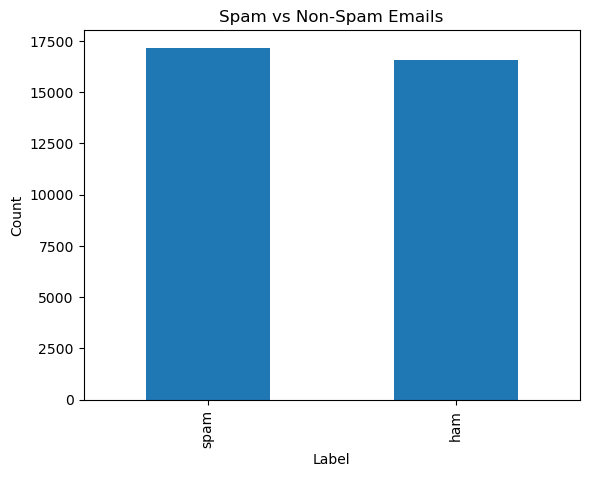

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('enron_spam_data.csv')

# Visualize the distribution of spam vs. non-spam
data['Spam/Ham'].value_counts().plot(kind='bar')
plt.title('Spam vs Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

#### Data preparation
I cannot use this data as it is right now. That's because it contains many unnecessary colums and the text is not ready for learning. That's why during the data preparation process I strip the csv of unnecessary columns and edit the necessary ones so that they are preparred for later steps.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

test_text = "This is a test."
print(word_tokenize(test_text))  # Should print: ['This', 'is', 'a', 'test', '.']

['This', 'is', 'a', 'test', '.']


In [51]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import string

nltk.data.path.append('/Users/rafalm/Documents/Personal Projects/Spam Email Detector/nltk_data')

nltk.download('punkt')
nltk.download('stopwords')

data = data.drop(columns=['Message ID', 'Date'])
data = data.dropna()

def preprocess_text(text):
    text = text.lower().strip()
    
    tokens = word_tokenize(text)
    
    tokens = [word for word in tokens if word.isalnum()]
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

data['cleaned_subject'] = data['Subject'].apply(preprocess_text)
data['cleaned_message'] = data['Message'].apply(preprocess_text)

X = data['cleaned_subject'] + ' ' + data['cleaned_message']
y = data['Spam/Ham']


[nltk_data] Downloading package punkt to /Users/rafalm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rafalm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/rafalm/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/Users/rafalm/Documents/Personal Projects/Spam Email Detector/nltk_data'
    - '/Users/rafalm/Documents/Personal Projects/Spam Email Detector/nltk_data'
    - '/Users/rafalm/Documents/Personal Projects/Spam Email Detector/nltk_data'
    - '/Users/rafalm/Documents/Personal Projects/Spam Email Detector/nltk_data'
**********************************************************************


Now let's convert all the word into numbers:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned message'])
X = vectorizer.fit_transform(data['cleaned subject'])

le = LabelEncoder()
y_encoded = le.fit_transform(y)

#### Data splitting
Now it's time to split the data. We want our data base to not only serve as a learning tool for our model, but also reserve some data to evaluate our model's performance.
Let's start by splitting the data. We'll use 80% of it to train the model and 20% to test it's effectiveness.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

#### Machine Learning Model Building
For this project I chose the Naive Bays distribution method. That's because yada yada yada

This is how I built it:

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ValueError: could not convert string to float: 're : coastal oil & gas corporationmelissa ,\ndeal # 348450 has been created and entered in sitara . in addition , the\nvolume has been edited from 3 , 000 to 1 , 000 on deal # 135714 for mjg inc . at\nmeter # 4179 . thanks .\nbob\nenron north america corp .\nfrom : melissa graves 07 / 28 / 2000 11 : 09 am\nto : robert cotten / hou / ect @ ect\ncc : hillary mack / corp / enron @ enron , donald p reinhardt / hou / ect @ ect , susan\nsmith / hou / ect @ ect , vance l taylor / hou / ect @ ect , brian m riley / hou / ect @ ect\nsubject : re : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\nbob ,\nhplc will be purchasing wellhead gas from the producer listed below for the\nproduction month of august . this production will be purchased on a " spot "\nbasis and a deal ticket should be created and entered into sitara based on\nthe following information :\ncounterparty meter volume price\ncoastal oil & gas corporation 4179 , albrecht # 4 well 2 , 000 mmbtu / d 93 % gas\ndaily\nadditionally , this is a producer svcs . deal and should be tracked in the im\nwellhead portfolio . . . attached to the gathering contract .\nthanks ,\nmelissa\n- - - - - - - - - - - - - - - - - - - - - - forwarded by melissa graves / hou / ect on 07 / 28 / 2000\n10 : 02 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\nenron north america corp .\nfrom : melissa graves 07 / 10 / 2000 02 : 18 pm\nto : hillary mack / corp / enron @ enron\ncc : robert cotten / hou / ect @ ect\nsubject : re : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\nhillary ,\nsee below for your answer .\nthanks ,\nmelissa\n- - - - - - - - - - - - - - - - - - - - - - forwarded by melissa graves / hou / ect on 07 / 10 / 2000\n02 : 17 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\njoanne wagstaff @ enron\n07 / 10 / 2000 02 : 14 pm\nto : melissa graves / hou / ect @ ect\ncc : robert cotten / hou / ect @ ect\nsubject : re : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\nmelissa ,\ni have confirmed through emails from bob walker that the name of the\ncounterparty for the albrecht # 4 well is coastal oil & gas corp .\nplease let me know if you have any questions .\nthanks ,\njoanne\nx 68228\nfrom : melissa graves @ ect 07 / 10 / 2000 10 : 14 am\nto : joanne wagstaff / na / enron @ enron\ncc : robert cotten / hou / ect @ ect\nsubject : re : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\njoanne ,\ncan you confirm the counterparty name on this please .\nthanks ,\nmelissa\n- - - - - - - - - - - - - - - - - - - - - - forwarded by melissa graves / hou / ect on 07 / 10 / 2000\n10 : 13 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\nenron north america corp .\nfrom : robert cotten 07 / 10 / 2000 10 : 11 am\nto : melissa graves / hou / ect @ ect\ncc :\nsubject : re : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\nmelissa ,\nhillary mack called me about the following deal . he believes the\ncounterparty should be coastal oil & gas usa , l . p . rather than coastal oil &\ngas corp . please advise . thanks .\nbob\n- - - - - - - - - - - - - - - - - - - - - - forwarded by robert cotten / hou / ect on 07 / 10 / 2000 10 : 08\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\nenron north america corp .\nfrom : robert cotten 07 / 10 / 2000 09 : 01 am\nto : melissa graves / hou / ect @ ect\ncc : daren j farmer / hou / ect @ ect , o \' neal d winfree / hou / ect @ ect , susan\nsmith / hou / ect @ ect , vance l taylor / hou / ect @ ect , george weissman / hou / ect @ ect ,\nhillary mack / corp / enron @ enron , amelia alland / hou / ect @ ect\nsubject : re : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\nmelissa ,\ndeal ticket # 325550 has been created and entered in sitara .\nbob\nenron north america corp .\nfrom : melissa graves 07 / 07 / 2000 03 : 34 pm\nto : robert cotten / hou / ect @ ect\ncc : donald p reinhardt / hou / ect @ ect , susan smith / hou / ect @ ect , vance l\ntaylor / hou / ect @ ect , george weissman / hou / ect @ ect , hillary\nmack / corp / enron @ enron , amelia alland / hou / ect @ ect\nsubject : re : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\nbob ,\nper george \' s note below , hplc will be purchasing wellhead gas from the\nproducer listed below for the production month of july . this production will\nbe purchased on a " spot " basis and a deal ticket should be created and\nentered into sitara based on the following information :\ncounterparty meter volume price\ncoastal oil & gas corporation 4179 , albrecht # 4 well 7 / 7 / 00 - 1 , 500 mmbtu / d\n7 / 8 / 00 - 3 , 000 mmbtu / d\n7 / 9 / 00 thru 7 / 31 / 00 - 4 , 000 mmbtu / d 93 % if / hsc\nadditionally , this is a producer svcs . deal and should be tracked in the im\nwellhead portfolio . . . attached to the gathering contract .\nthanks ,\nmelissa\n- - - - - - - - - - - - - - - - - - - forwarded by melissa graves / hou / ect on 07 / 07 / 2000 03 : 03\npm - - - - - - - - - - - - - - - - - - - - - - - - - - -\nenron north america corp .\nfrom : george weissman 07 / 07 / 2000 01 : 11 pm\nto : melissa graves / hou / ect @ ect , shawna flynn / hou / ect @ ect\ncc : sandi m braband / hou / ect @ ect , robert walker / hou / ect @ ect , vicente\nsarmiento / gco / enron @ enron , brian m riley / hou / ect @ ect , lauri a\nallen / hou / ect @ ect\nsubject : re : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\nmelissa ,\nbased on the attached contract preparation request for a spot gtc for the\ncoastal oil the\nlegal department has prepared and is currently circulating a ratification and\nconsent to assign document to reflect this transaction .\nthe spot gtc requested herein will cover gas from the albrecht # 4 well only .\nthe albrecht # 4 will not be covered by 96008903 , nor will the wells currently\nsubject to 96008903 be subject to the spot gtc .\nshawna , please prepare the termination letter for 96008903 as requested .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 07 / 07 / 2000\n01 : 04 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\ndebbie boudar @ enron\n07 / 06 / 2000 03 : 25 pm\nto : george weissman / hou / ect @ ect\ncc : robert walker / hou / ect @ ect , vicente sarmiento / gco / enron @ enron , brian m\nriley / hou / ect @ ect\nsubject : re : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\nin regards to meter 098 - 4179 the following information is what i have been\nable to determine from the information available to me .\nto your questions :\n1 . cannot determine who owns this meter . i will contact molly carriere on\nmonday when she returns .\n2 . hpl has a fifty ( 50 ) ft . easement at this location which does contain\nlanguage for appurtenance rights within the 50 \' .\n3 . i pulled the meter file for this location which was prepared during\nproject rock and it does not contain a facility agreement so i am assuming\none was not located .\nhope this helps .\nfrom : george weissman @ ect 07 / 06 / 2000 11 : 09 am\nto : debbie boudar / na / enron @ enron\ncc : robert walker / hou / ect @ ect , vicente sarmiento / gco / enron @ enron , brian m\nriley / hou / ect @ ect\nsubject : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\ndebbie ,\nmeter 098 - 4179 is located at sta . plus 40 + 85 on align . dwg . hc - 1130 - 18 - h in\ngoliad co . , tx . in connection with the facility agreement request below , we\nneed to know the following :\n1 . who owns the meter , hplc or the operator ?\n2 . do we own an easement and an access right of way to the meter station ?\n3 . is there , to your knowledge , a facility agreement in place covering this\nmeter ? we cannot locate such an agreement in our records .\nthanks . george x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 07 / 06 / 2000\n11 : 06 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\nenron north america corp .\nfrom : george weissman 07 / 06 / 2000 09 : 37 am\nto : shawna flynn / hou / ect @ ect\ncc : robert walker / hou / ect @ ect , brian m riley / hou / ect @ ect , vicente\nsarmiento / gco / enron @ enron , melissa graves / hou / ect @ ect , lal\nechterhoff / hou / ect @ ect , james r haden / hou / ect @ ect\nsubject : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\nshawna ,\nattached is a contract preparation request for a facilities agreement for the\ncoastal oil the\nlegal department has prepared and is currently circulating a ratification and\nconsent to assign document to reflect this transaction .\nwe have been unable to locate an existing facility agreement for the 3\npreviously drilled wells and suspect that no such agreement exists .\nthe facility agreement requested herein is intended to cover only alterations\nto be made to existing meter 098 - 4179 to install an h 2 s monitor and necessary\nvalving to allow hplc to accept gas from the newly drilled albrecht # 4 well .\nonce the h 2 s monitor has been installed and the albrecht # 4 well is ready to\nflow , we intend to paper the purchase of gas from the albrecht # 4 well only\nvia a spot confirmation pursuant to a spot gtc . the albrecht # 4 will not be\ncovered by 96008903 , nor will the wells currently subject to 96008903 be\nsubject to the spot gtc .\ncoastal will reimburse hplc $ 39 , 600 for the cost of the installation .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 07 / 06 / 2000\n09 : 21 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\nenron north america corp .\nfrom : george weissman 07 / 04 / 2000 01 : 28 pm\nto : lal echterhoff / hou / ect @ ect , pat flavin / gco / enron @ enron\ncc : brian m riley / hou / ect @ ect , jill t zivley / hou / ect @ ect , vicente\nsarmiento / gco / enron @ enron , james r haden / hou / ect @ ect , donnie\nmccabe / gco / enron @ enron , mark walch / gco / enron @ enron , steve hpl\nschneider / hou / ect @ ect\nsubject : coastal oil & gas corporation\nalbrecht # 4 well\nmeter 098 - 4179 , goliad co . , tx\nlal ,\nwe intend to attempt to connect about 4 , 000 mmbtu / d of new production from\nthe newly drilled coastal oil in may , 2000 , the meter flowed about 960\nmmbtu / d of 3 . 36 % co 2 gas .\nthe content of the albrecht # 4 gas according to the field gas analysis\nprepared by coastal oil the albrecht # 4 h 2 s content\nis similar to that of the three wells currently producing 960 mmbtu / d behind\nmeter 098 - 4179 , the miller - albrecht unit # 1 - a and the hoff heller gas unit\n# 1 a & # 2 d . coastal further purports that for some time now it ( and / or its\npredecessor , mjg , corp . ) has treated these three wells for h 2 s in a manner\nsufficient to reduce the h 2 s content delivered into hplc to permissible\nlevels . coastal has further indicated that it intends to reduce the h 2 s\ncontent of the albrecht # 4 to permissible levels before delivering same to\nhplc . in your opinion , should coastal be forced to install an h 2 s monitor\nfor this new gas prior to flowing same to hplc ?\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 07 / 04 / 2000\n12 : 48 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\nchristy sweeney\n06 / 29 / 2000 04 : 56 pm\nto : lisa hesse / hou / ect @ ect\ncc : brian m riley / hou / ect @ ect , george weissman / hou / ect @ ect , melissa\ngraves / hou / ect @ ect , joanne wagstaff / na / enron @ enron , heidi withers / hou / ect @ ect\nsubject : transport request for coastal albrecht # 4 , goliad county , tx\nlisa ,\nattached is our physical well connect form , including a transportation quote\nsheet , for the coastal albrecht # 4 well in goliad county , tx . please\nprovide us with a transport quote . i have attached below a quote you gave us\nin april 2000 . the volume is now 5 , 000 / day .\ni am headed that way with a map that shows the well \' s location in relation to\nus , tejas , koch , and tetco . please note 2 % fuel .\nthank you ! ! !\nchristy\n39050\n- - - - - - - - - - - - - - - - - - - - - - forwarded by christy sweeney / hou / ect on 06 / 29 / 2000\n02 : 46 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\nenron north america corp .\nfrom : lisa hesse 04 / 07 / 2000 10 : 48 am\nto : brian m riley / hou / ect @ ect\ncc : lauri a allen / hou / ect @ ect , mary m smith / hou / ect @ ect , heidi\nwithers / hou / ect @ ect , melissa graves / hou / ect @ ect , george weissman / hou / ect @ ect ,\nsusan smith / hou / ect @ ect , donald p reinhardt / hou / ect @ ect , vance l\ntaylor / hou / ect @ ect , lisa hesse / hou / ect @ ect , lisa hesse / hou / ect @ ect\nsubject : mjg , inc . meter 4179 and cokinos meter 9676\nbrian ,\nhere are the transport rates for the below meters :\nmjg meter 4179 3 . 39 % co 2 1 year quote april 00\nrel : 1180 avg . 1200 - 1988 . 014\nloc . . 05\np / l density . 02\nquality . 049\nmarket adjustment . 05\n_ _ _ _\n. . 183\nless discount and market fee . 02\n_ _ _ _\n. 16\nplease call if you have any questions or comments . lisa 3 5901'

#### Model testing
Awesome! We've got our model up and running. Now it's time to test it's accurracy. Thankfully there are many built-in functions to help us do just that.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))